In [2]:
#import nltk
#nltk.download()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk #natural language tool kit
import re  # regular expression library
import requests #library to work with URLs

Natural language processing is text Data. 
Text data is unsupervised learning data and sources of text data are documents(pdf, word, excel,text), databases, social media, IOT devices, etc.

Text data is large data and requires preprocessing for bringing to a structure where algorithms can be build.

Preprocessing involves tasks like removing punctuations, digits, special characters, hyperlinks, emojis, stop words(is,a,an,the,etc),etc.

Post preprocessing text must me tocanized into either sentences or words.NLP is all about words or tokens.

Conversion of text into matrx of numbers like documnet term matrix, term frequency, inverse documnet frequency matrix or word embedding.

Models can be build- supervised Leraning(regression or classification)
                    -unsupervised learning(clustering or topic modelling) or transfomer models(encoder-decoder models) or recurrent neural networks(LSTM or GRU)

## -------------------WEB SCRAPING----------------------
#### Web Scraping is scraping content like text from html, webpages. Opensource wen pages can be scraped

In [4]:
Climatewiki=requests.get("https://en.wikipedia.org/wiki/Climate_change")

In [5]:
from bs4 import BeautifulSoup
climatedf=BeautifulSoup(Climatewiki.content,"lxml")

In [6]:
climatetxt=climatedf.getText(strip=True)

In [7]:
print(climatetxt)

Climate change - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Terminology2Global temperature riseToggle Global temperature rise subsection2.1Temperatures prior to present-day global warming2.2Warming since the Industrial Revolution2.2.1Differences by region2.3Future global temperatures3Causes of recent global temperature riseToggle Causes of recent global temperature rise subsection3.1Greenhouse gases3.2Land surface changes3.3Other factors3.3.1Aerosols and clouds3.3.2Solar and volcanic activity3.3.3Climate change feedbacks4Modelling5ImpactsToggle Impacts subsection5.1Environmental effects5.2Tipping points and long-term impacts5.3Nature and

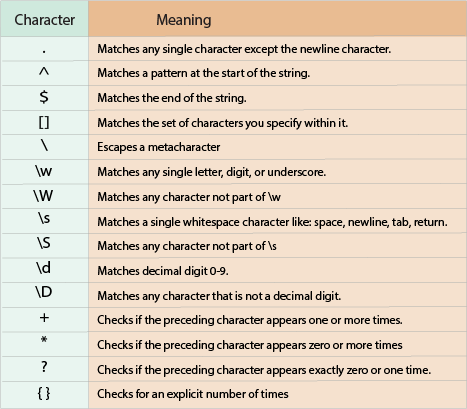

### Clean text before tokenizing

In [8]:
#replace digits in [] or [23] with space
climatetxt=re.sub(r'\[\d+\]'," ",climatetxt)

#re.sub(pattern to be replaced, pattern replacement)," " indicates space

In [9]:
climatetxt=re.sub(r'\[\w+\]'," ",climatetxt)

In [10]:
climatetxt=re.sub(r'\(\w+\)'," ",climatetxt)

In [11]:
climatetxt=re.sub(r'[0-9]+'," ",climatetxt) #Remove digits 

In [12]:
climatetxt=re.sub("\xa0°C"," ",climatetxt) 

In [13]:
climatetxt

'Climate change - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide  Terminology Global temperature riseToggle Global temperature rise subsection . Temperatures prior to present-day global warming . Warming since the Industrial Revolution . . Differences by region . Future global temperatures Causes of recent global temperature riseToggle Causes of recent global temperature rise subsection . Greenhouse gases . Land surface changes . Other factors . . Aerosols and clouds . . Solar and volcanic activity . . Climate change feedbacks Modelling ImpactsToggle Impacts subsection . Environmental effects . Tipping points and long-term impacts . Nature and wi

#### Tokenzation - Breaking content into sentences or words
#### Sentences Tokenzation -Breaking content into sentences delimiter is fullstop
#### Word Tokenzation - Breaking content into words deliniter is space

In [14]:
from nltk.tokenize import sent_tokenize

In [15]:
climatesentences= sent_tokenize(climatetxt) #breaking into sentnces
climatesentences=pd.DataFrame(climatesentences,columns=['sentence'])

#### Text Blob based sentiment analysis.TextBlob Library has sentiment function that calculates 2 scores-polarity and subjectvity.
#### Polarity score lies between -1 to 1. Polarity score is used for sentiment analysis. Polarity score is calculated by comparing with list or lexicon of positive and neutral words.

#### Subjectivity Score lies between 0 and 1. Close to 1 indicates high personal option and close to 0 indicates low personal opinion

In [16]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from textblob import TextBlob

In [18]:
s1=TextBlob("tendulkar is greatest batsman in cricket")
s1.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [19]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Neutral"
    else:
        return "Negative"

In [20]:
climatesentences['sentiment']=[str(analyze_sentiment(x)) for x in climatesentences.sentence]

In [21]:
climatesentences['sentiment'].value_counts()

sentiment
Neutral     1718
Positive     407
Negative     194
Name: count, dtype: int64

# Tokenization 

In [22]:
# NLP core format is words/tokens
from nltk.tokenize import word_tokenize

In [23]:
climatewords=word_tokenize(climatetxt) # break content into words/tokens
climatewords=[w.lower() for w in climatewords] # convert to lowercase or smallcaps
climatewords=[w for w in climatewords if w.isalnum()] # selects only alphabets

In [24]:
from nltk.corpus import stopwords


In [25]:
english_stopwords=set(stopwords.words("english"))# stopwords are is, a,a the, then, it, to,etc
climatewords=[w for w in climatewords if not w in english_stopwords] # remove stopwords
climatewords=[w for w in climatewords if len(w)>2] # Select words with more than 2 characters

In [26]:
from nltk.probability import FreqDist
wordfreq=FreqDist(climatewords)
wordfreq.most_common(20)

[('climate', 469),
 ('change', 321),
 ('global', 195),
 ('warming', 177),
 ('retrieved', 134),
 ('emissions', 99),
 ('carbon', 86),
 ('energy', 78),
 ('greenhouse', 76),
 ('temperature', 64),
 ('may', 62),
 ('summary', 61),
 ('cid', 61),
 ('original', 58),
 ('impacts', 52),
 ('earth', 52),
 ('surface', 50),
 ('january', 50),
 ('heat', 49),
 ('october', 47)]

## ---------Forming word cloud -----------

In [27]:
pip install -U wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from wordcloud import WordCloud

In [29]:
climate_words=(" ").join(climatewords)

In [30]:
wordcloud=WordCloud(width=1000,height=500,stopwords="english_stopwords",
                    max_words=250,colormap="plasma",
                    collocations=False).generate(str(climate_words))

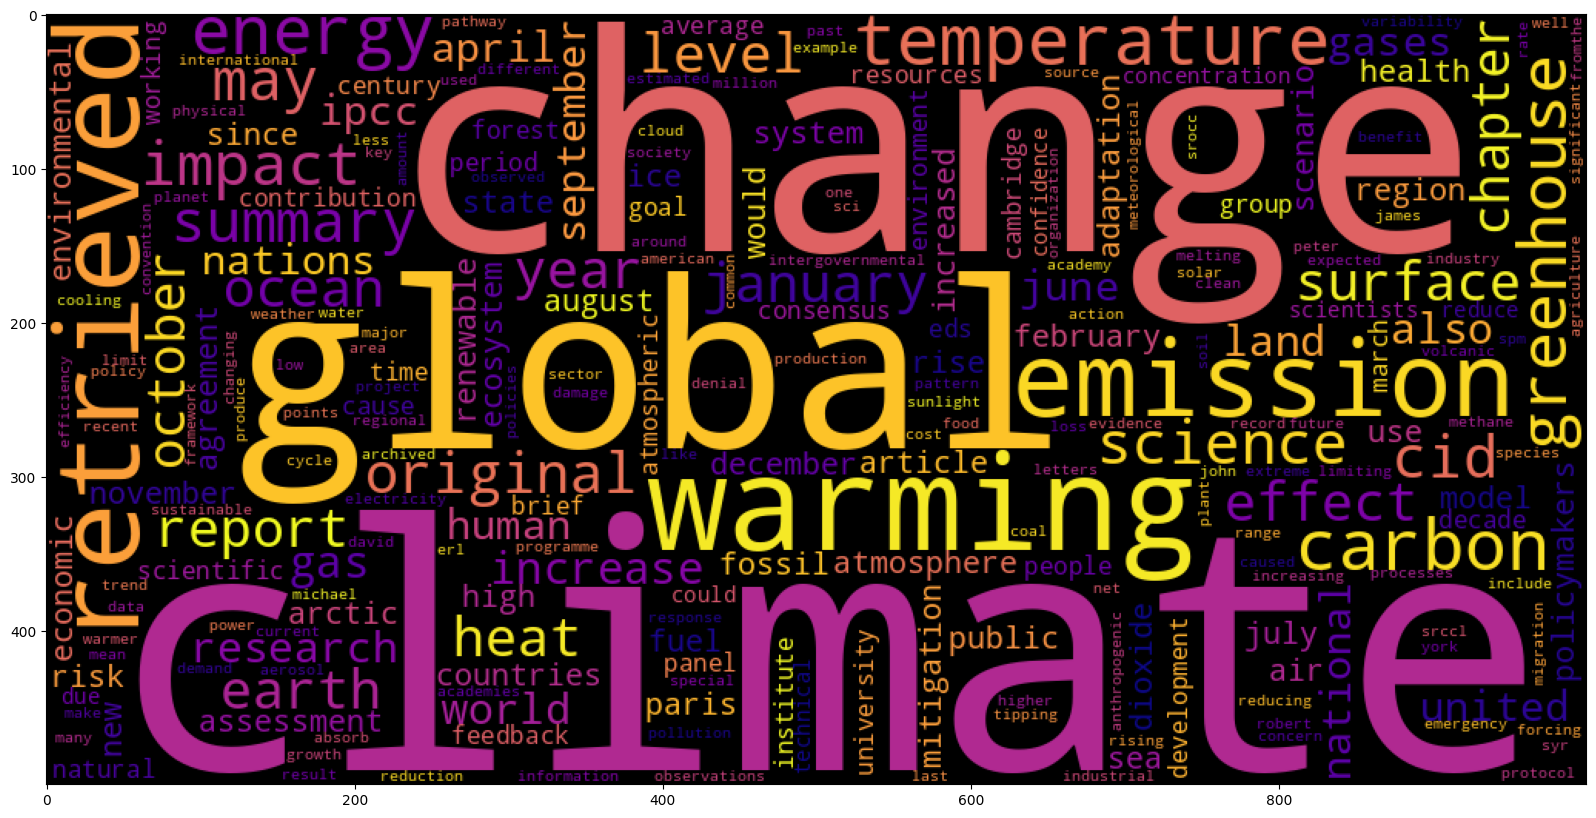

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

# --------------   Vectorization   -------------

## Vectorization
It is conversion must be done to implement machine learning , deep learning or AI algorithms
### 2 types of vectorization -Document term matrix, term frequency inverse document frequency matrix

Document term matrix is by default rows are documents/sentences and columns are word/tokens

D1-The car is driven on the road
D2-The truck is driven on the highway
D3-Both truck and car are driven on highway

#### Post preprocessing
D1-car,driven, road
D2-truck driven ,highway
D3-truck,car,driven,highwat

###  car driven road highway truck


D1- 1,1,1,0,0
D2- 0,1,0,1,1

#### TFIDF for car
TF of car = 1/3 * 1/3 =0.33 * 0.33 =0.1089
IDF of car = log(3/2)= 0.1760
TFIDF of car = 0.1089*0.1760 = 0.0191

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
#unigrams
#DTM=CountVectorizer(max_features=20,stop_words="english")
#X_DTM=DTM.fit_transform(climatewords)

In [34]:
#pd.DataFrame(X_DTM.toarray(),columns=DTM.get_feature_names_out()).head(2)

In [35]:
#Bigrams
#DTM_bigrams=

In [36]:
#To remove unneccesary stop words
english_stopwords=list(english_stopwords)
english_stopwords.extend("al ar bibcode doi et pdf pp retreived wg ch co cid issn".split())

DTM=CountVectorizer(max_features=20,stop_words=list(english_stopwords))

In [37]:
X_dtm=DTM.fit_transform(climatesentences.sentence)

In [38]:
pd.DataFrame(X_dtm.toarray(),columns=DTM.get_feature_names_out()).head()

,carbon,change,climate,earth,emissions,energy,global,greenhouse,ipcc,isbn,may,national,original,pmid,retrieved,science,summary,temperature,warming,world
0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# -----------------  WORD EMBEDDINGS -----------------------

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer # method:1 for machine leaning models

In [54]:
tfidf=TfidfVectorizer(max_features=20, stop_words=list(english_stopwords),ngram_range=(2,2))
X_tfidf=tfidf.fit_transform(climatesentences.sentence)

In [55]:
pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_).head()

,climate change,global warming,greenhouse gases,carbon dioxide,level rise,greenhouse gas,gas emissions,sea level,united nations,panel climate,summary policymakers,research letters,technical summary,ipcc srccl,archivedfrom original,ipcc sr,intergovernmental panel,pmc pmid,university press,carbon brief
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from gensim.models import Word2Vec # Method2: for deep learning models 

In [44]:
model=Word2Vec([climatewords],vector_size=10,window=5,min_count=1)
model.wv['climate'] #vectorization-word embeddings for each word 10 dimensional
model.wv['change'] #vectorization-word embeddings for each word 10 dimensional
model.wv.similarity('climate','global')
model.wv.similarity('climate','change')
model.wv.most_similar('climate')

[('ocean', 0.9444671273231506),
 ('years', 0.9403051137924194),
 ('change', 0.9374161958694458),
 ('consensus', 0.9227707386016846),
 ('human', 0.9068565368652344),
 ('global', 0.899271547794342),
 ('new', 0.8990268111228943),
 ('also', 0.8915176391601562),
 ('gas', 0.8911682367324829),
 ('december', 0.8855813145637512)]

In [45]:
x_tfid1=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
y=LabelEncoder().fit_transform(climatesentences['sentiment'])

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic=LogisticRegression().fit(x_tfid1,y)

In [50]:
logistic.score(x_tfid1,y)

0.7645536869340233

In [51]:
logistic_pred=logistic.predict(x_tfid1)

In [52]:
pd.crosstab(y,logistic_pred)

col_0,1,2
row_0,,
0,192,2
1,1707,11
2,341,66
